<a href="https://colab.research.google.com/github/Vijaypurushoth988373/DW12_Task_8/blob/main/Natural_Language_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [ ]:
from textblob import TextBlob
word10 = TextBlob('hello')
z=word10.translate(from_lang='en', to ='ta')
print(z)

வணக்கம்


In [ ]:
import pandas as pd
df = pd.read_csv('/content/English.csv')

In [ ]:
df.head()

,English words/sentences
0,Hi.
1,Run!
2,Run!
3,Who?
4,Wow!


# Task 2

Create a program that needs to automatically correct that spelling from the word or a given sentence. (Language : English) 


In [ ]:
from textblob import TextBlob
text = TextBlob(input("Enter the Word : "))
print(text.correct())

Enter the Word : gret
great


# Task 3

Create an application that should be used by the HR Team to filter the resume based on the Skills.

**Data Used**

We have publically available data from Kaggle. You can download the data using the below link.

In [ ]:
#Loading Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
#Loading Data
resumeDataSet = pd.read_csv('/content/UpdatedResumeDataSet.csv' ,encoding='utf-8')

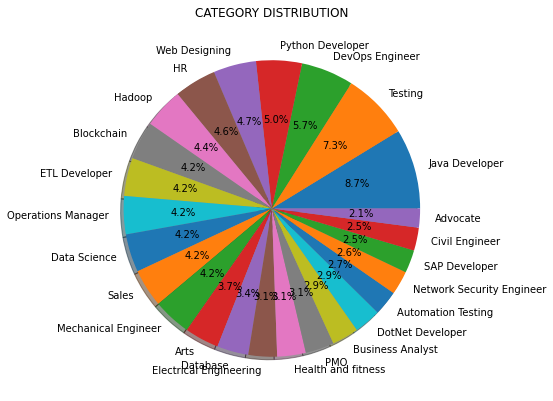

In [ ]:
#EDA
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)
#plt.savefig('../output/jobcategory_details.png')
#Pie-chart
targetCounts = resumeDataSet['Category'].value_counts().reset_index()['Category']
targetLabels  = resumeDataSet['Category'].value_counts().reset_index()['index']
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, )
#plt.savefig('../output/category_dist.png')

In [ ]:
#Data Preprocessing
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [ ]:
#Model Building
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

(769, 1500)
(193, 1500)


In [ ]:
#Results
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("n Classification report for classifier %s:n%sn" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99
n Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):n              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 7.3 MB/s 


In [ ]:
#Resume Phrase Matcher code


#importing all required libraries

import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

#Function to read resumes from the folder one by one
mypath='D:\Vijay' #enter your path here where you saved the resumes
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

def pdfextract(file):
    fileReader = PyPDF2.PdfFileReader(open(file,'rb'))
    countpage = fileReader.getNumPages()
    count = 0
    text = []
    while count < countpage:    
        pageObj = fileReader.getPage(count)
        count +=1
        t = pageObj.extractText()
        print (t)
        text.append(t)
    return text

#function to read resume ends


#function that does phrase matching and builds a candidate profile
def create_profile(file):
    text = pdfextract(file) 
    text = str(text)
    text = text.replace("\\n", "")
    text = text.lower()
    #below is the csv where we have all the keywords, you can customize your own
    keyword_dict = pd.read_csv('D:/NLP_Resume/resume/template_new.csv')
    stats_words = [nlp(text) for text in keyword_dict['Statistics'].dropna(axis = 0)]
    NLP_words = [nlp(text) for text in keyword_dict['NLP'].dropna(axis = 0)]
    ML_words = [nlp(text) for text in keyword_dict['Machine Learning'].dropna(axis = 0)]
    DL_words = [nlp(text) for text in keyword_dict['Deep Learning'].dropna(axis = 0)]
    R_words = [nlp(text) for text in keyword_dict['R Language'].dropna(axis = 0)]
    python_words = [nlp(text) for text in keyword_dict['Python Language'].dropna(axis = 0)]
    Data_Engineering_words = [nlp(text) for text in keyword_dict['Data Engineering'].dropna(axis = 0)]

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats_words)
    matcher.add('NLP', None, *NLP_words)
    matcher.add('ML', None, *ML_words)
    matcher.add('DL', None, *DL_words)
    matcher.add('R', None, *R_words)
    matcher.add('Python', None, *python_words)
    matcher.add('DE', None, *Data_Engineering_words)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
       
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)
        
#function ends
        
#code to execute/call the above functions

final_database=pd.DataFrame()
i = 0 
while i < len(onlyfiles):
    file = onlyfiles[i]
    dat = create_profile(file)
    final_database = final_database.append(dat)
    i +=1
    print(final_database)

    
#code to count words under each category and visulaize it through Matplotlib

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']
#execute the below line if you want to see the candidate profile in a csv format
#sample2=new_data.to_csv('sample.csv')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()

FileNotFoundError: ignored

# Task 4


Create a chatbot for Hotel Management to Book Rooms 

In [ ]:
!pip install chatterbot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import datetime

# Global List Declaration
name = []
phno = []
add = []
checkin = []
checkout = []
room = []
price = []
rc = []
p = []
roomno = []
custid = []
day = []

# Global Variable Declaration

i = 0

# Home Function
def Home():
	
	print("\t\t\t\t\t\t WELCOME TO HOTEL ANCASA\n")
	print("\t\t\t 1 Booking\n")
	print("\t\t\t 2 Rooms Info\n")
	print("\t\t\t 3 Room Service(Menu Card)\n")
	print("\t\t\t 4 Payment\n")
	print("\t\t\t 5 Record\n")
	print("\t\t\t 0 Exit\n")

	ch=int(input("->"))
	
	if ch == 1:
		print(" ")
		Booking()
	
	elif ch == 2:
		print(" ")
		Rooms_Info()
	
	elif ch == 3:
		print(" ")
		restaurant()
	
	elif ch == 4:
		print(" ")
		Payment()
	
	elif ch == 5:
		print(" ")
		Record()
	
	else:
		exit()

# Function used in booking

def date(c):
	
	if c[2] >= 2019 and c[2] <= 2020:
		
		if c[1] != 0 and c[1] <= 12:
			
			if c[1] == 2 and c[0] != 0 and c[0] <= 31:
				
				if c[2]%4 == 0 and c[0] <= 29:
					pass
				
				elif c[0]<29:
					pass
				
				else:
					print("Invalid date\n")
					name.pop(i)
					phno.pop(i)
					add.pop(i)
					checkin.pop(i)
					checkout.pop(i)
					Booking()
			
			
			# if month is odd & less than equal
			# to 7th month
			elif c[1] <= 7 and c[1]%2 != 0 and c[0] <= 31:
				pass
			
			# if month is even & less than equal to 7th
			# month and not 2nd month
			elif c[1] <= 7 and c[1]%2 == 0 and c[0] <= 30 and c[1] != 2:
				pass
			
			# if month is even & greater than equal
			# to 8th month
			elif c[1] >= 8 and c[1]%2 == 0 and c[0] <= 31:
				pass
			
			# if month is odd & greater than equal
			# to 8th month
			elif c[1]>=8 and c[1]%2!=0 and c[0]<=30:
				pass
			
			else:
				print("Invalid date\n")
				name.pop(i)
				phno.pop(i)
				add.pop(i)
				checkin.pop(i)
				checkout.pop(i)
				Booking()
				
		else:
			print("Invalid date\n")
			name.pop(i)
			phno.pop(i)
			add.pop(i)
			checkin.pop(i)
			checkout.pop(i)
			Booking()
			
	else:
		print("Invalid date\n")
		name.pop(i)
		phno.pop(i)
		add.pop(i)
		checkin.pop(i)
		checkout.pop(i)
		Booking()


# Booking function
def Booking():
	
		# used global keyword to
		# use global variable 'i'
		global i
		print(" BOOKING ROOMS")
		print(" ")
		
		while 1:
			n = str(input("Name: "))
			p1 = str(input("Phone No.: "))
			a = str(input("Address: "))
			
			# checks if any field is not empty
			if n!="" and p1!="" and a!="":
				name.append(n)
				add.append(a)
				break
				
			else:
				print("\tName, Phone no. & Address cannot be empty..!!")
			
		cii=str(input("Check-In: "))
		checkin.append(cii)
		cii=cii.split('/')
		ci=cii
		ci[0]=int(ci[0])
		ci[1]=int(ci[1])
		ci[2]=int(ci[2])
		date(ci)
		
		coo=str(input("Check-Out: "))
		checkout.append(coo)
		coo=coo.split('/')
		co=coo
		co[0]=int(co[0])
		co[1]=int(co[1])
		co[2]=int(co[2])
		
		# checks if check-out date falls after
		# check-in date
		if co[1]<ci[1] and co[2]<ci[2]:
			
			print("\n\tErr..!!\n\tCheck-Out date must fall after Check-In\n")
			name.pop(i)
			add.pop(i)
			checkin.pop(i)
			checkout.pop(i)
			Booking()
		elif co[1]==ci[1] and co[2]>=ci[2] and co[0]<=ci[0]:
			
			print("\n\tErr..!!\n\tCheck-Out date must fall after Check-In\n")
			name.pop(i)
			add.pop(i)
			checkin.pop(i)
			checkout.pop(i)
			Booking()
		else:
			pass
		
		date(co)
		d1 = datetime.datetime(ci[2],ci[1],ci[0])
		d2 = datetime.datetime(co[2],co[1],co[0])
		d = (d2-d1).days
		day.append(d)
		
		print("----SELECT ROOM TYPE----")
		print(" 1. Standard Non-AC")
		print(" 2. Standard AC")
		print(" 3. 3-Bed Non-AC")
		print(" 4. 3-Bed AC")
		print(("\t\tPress 0 for Room Prices"))
		
		ch=int(input("->"))
		
		# if-conditions to display alloted room
		# type and it's price
		if ch==0:
			print(" 1. Standard Non-AC - Rs. 3500")
			print(" 2. Standard AC - Rs. 4000")
			print(" 3. 3-Bed Non-AC - Rs. 4500")
			print(" 4. 3-Bed AC - Rs. 5000")
			ch=int(input("->"))
		if ch==1:
			room.append('Standard Non-AC')
			print("Room Type- Standard Non-AC")
			price.append(3500)
			print("Price- 3500")
		elif ch==2:
			room.append('Standard AC')
			print("Room Type- Standard AC")
			price.append(4000)
			print("Price- 4000")
		elif ch==3:
			room.append('3-Bed Non-AC')
			print("Room Type- 3-Bed Non-AC")
			price.append(4500)
			print("Price- 4500")
		elif ch==4:
			room.append('3-Bed AC')
			print("Room Type- 3-Bed AC")
			price.append(5000)
			print("Price- 5000")
		else:
			print(" Wrong choice..!!")


		# randomly generating room no. and customer
		# id for customer
		rn = random.randrange(40)+300
		cid = random.randrange(40)+10
		
		
		# checks if alloted room no. & customer
		# id already not alloted
		while rn in roomno or cid in custid:
			rn = random.randrange(60)+300
			cid = random.randrange(60)+10
			
		rc.append(0)
		p.append(0)
				
		if p1 not in phno:
			phno.append(p1)
		elif p1 in phno:
			for n in range(0,i):
				if p1== phno[n]:
					if p[n]==1:
						phno.append(p1)
		elif p1 in phno:
			for n in range(0,i):
				if p1== phno[n]:
					if p[n]==0:
						print("\tPhone no. already exists and payment yet not done..!!")
						name.pop(i)
						add.pop(i)
						checkin.pop(i)
						checkout.pop(i)
						Booking()
		print("")
		print("\t\t\t***ROOM BOOKED SUCCESSFULLY***\n")
		print("Room No. - ",rn)
		print("Customer Id - ",cid)
		roomno.append(rn)
		custid.append(cid)
		i=i+1
		n=int(input("0-BACK\n ->"))
		if n==0:
			Home()
		else:
			exit()

# ROOMS INFO
def Rooms_Info():
	print("		 ------ HOTEL ROOMS INFO ------")
	print("")
	print("STANDARD NON-AC")
	print("---------------------------------------------------------------")
	print("Room amenities include: 1 Double Bed, Television, Telephone,")
	print("Double-Door Cupboard, 1 Coffee table with 2 sofa, Balcony and")
	print("an attached washroom with hot/cold water.\n")
	print("STANDARD NON-AC")
	print("---------------------------------------------------------------")
	print("Room amenities include: 1 Double Bed, Television, Telephone,")
	print("Double-Door Cupboard, 1 Coffee table with 2 sofa, Balcony and")
	print("an attached washroom with hot/cold water + Window/Split AC.\n")
	print("3-Bed NON-AC")
	print("---------------------------------------------------------------")
	print("Room amenities include: 1 Double Bed + 1 Single Bed, Television,")
	print("Telephone, a Triple-Door Cupboard, 1 Coffee table with 2 sofa, 1")
	print("Side table, Balcony with an Accent table with 2 Chair and an")
	print("attached washroom with hot/cold water.\n")
	print("3-Bed AC")
	print("---------------------------------------------------------------")
	print("Room amenities include: 1 Double Bed + 1 Single Bed, Television,")
	print("Telephone, a Triple-Door Cupboard, 1 Coffee table with 2 sofa, ")
	print("1 Side table, Balcony with an Accent table with 2 Chair and an")
	print("attached washroom with hot/cold water + Window/Split AC.\n\n")
	print()
	n=int(input("0-BACK\n ->"))
	if n==0:
		Home()
	else:
		exit()

# RESTAURANT FUNCTION
def restaurant():
	ph=int(input("Customer Id: "))
	global i
	f=0
	r=0
	for n in range(0,i):
		if custid[n]==ph and p[n]==0:
			f=1
			print("-------------------------------------------------------------------------")
			print("						 Hotel AnCasa")
			print("-------------------------------------------------------------------------")
			print("						 Menu Card")
			print("-------------------------------------------------------------------------")
			print("\n BEVARAGES							 26 Dal Fry................ 140.00")
			print("----------------------------------	 27 Dal Makhani............ 150.00")
			print(" 1 Regular Tea............. 20.00	 28 Dal Tadka.............. 150.00")
			print(" 2 Masala Tea.............. 25.00")
			print(" 3 Coffee.................. 25.00	 ROTI")
			print(" 4 Cold Drink.............. 25.00	 ----------------------------------")
			print(" 5 Bread Butter............ 30.00	 29 Plain Roti.............. 15.00")
			print(" 6 Bread Jam............... 30.00	 30 Butter Roti............. 15.00")
			print(" 7 Veg. Sandwich........... 50.00	 31 Tandoori Roti........... 20.00")
			print(" 8 Veg. Toast Sandwich..... 50.00	 32 Butter Naan............. 20.00")
			print(" 9 Cheese Toast Sandwich... 70.00")
			print(" 10 Grilled Sandwich........ 70.00	 RICE")
			print("									 ----------------------------------")
			print(" SOUPS								 33 Plain Rice.............. 90.00")
			print("----------------------------------	 34 Jeera Rice.............. 90.00")
			print(" 11 Tomato Soup............ 110.00	 35 Veg Pulao.............. 110.00")
			print(" 12 Hot & Sour............. 110.00	 36 Peas Pulao............. 110.00")
			print(" 13 Veg. Noodle Soup....... 110.00")
			print(" 14 Sweet Corn............. 110.00	 SOUTH INDIAN")
			print(" 15 Veg. Munchow........... 110.00	 ----------------------------------")
			print("									 37 Plain Dosa............. 100.00")
			print(" MAIN COURSE						 38 Onion Dosa............. 110.00")
			print("----------------------------------	 39 Masala Dosa............ 130.00")
			print(" 16 Shahi Paneer........... 110.00	 40 Paneer Dosa............ 130.00")
			print(" 17 Kadai Paneer........... 110.00	 41 Rice Idli.............. 130.00")
			print(" 18 Handi Paneer........... 120.00	 42 Sambhar Vada........... 140.00")
			print(" 19 Palak Paneer........... 120.00")
			print(" 20 Chilli Paneer.......... 140.00	 ICE CREAM")
			print(" 21 Matar Mushroom......... 140.00	 ----------------------------------")
			print(" 22 Mix Veg................ 140.00	 43 Vanilla................. 60.00")
			print(" 23 Jeera Aloo............. 140.00	 44 Strawberry.............. 60.00")
			print(" 24 Malai Kofta............ 140.00	 45 Pineapple............... 60.00")
			print(" 25 Aloo Matar............. 140.00	 46 Butter Scotch........... 60.00")
			print("Press 0 -to end ")
			ch=1
			while(ch!=0):
				
				ch=int(input(" -> "))
				
				# if-elif-conditions to assign item
				# prices listed in menu card
				if ch==1 or ch==31 or ch==32:
					rs=20
					r=r+rs
				elif ch<=4 and ch>=2:
					rs=25
					r=r+rs
				elif ch<=6 and ch>=5:
					rs=30
					r=r+rs
				elif ch<=8 and ch>=7:
					rs=50
					r=r+rs
				elif ch<=10 and ch>=9:
					rs=70
					r=r+rs
				elif (ch<=17 and ch>=11) or ch==35 or ch==36 or ch==38:
					rs=110
					r=r+rs
				elif ch<=19 and ch>=18:
					rs=120
					r=r+rs
				elif (ch<=26 and ch>=20) or ch==42:
					rs=140
					r=r+rs
				elif ch<=28 and ch>=27:
					rs=150
					r=r+rs
				elif ch<=30 and ch>=29:
					rs=15
					r=r+rs
				elif ch==33 or ch==34:
					rs=90
					r=r+rs
				elif ch==37:
					rs=100
					r=r+rs
				elif ch<=41 and ch>=39:
					rs=130
					r=r+rs
				elif ch<=46 and ch>=43:
					rs=60
					r=r+rs
				elif ch==0:
					pass
				else:
					print("Wrong Choice..!!")
			print("Total Bill: ",r)
			
			# updates restaurant charges and then
			# appends in 'rc' list
			r=r+rc.pop(n)
			rc.append(r)	
		else:
			pass
	if f == 0:
		print("Invalid Customer Id")
	n=int(input("0-BACK\n ->"))
	if n==0:
		Home()
	else:
		exit()
	
				
# PAYMENT FUNCTION			
def Payment():
	
	ph=str(input("Phone Number: "))
	global i
	f=0
	
	for n in range(0,i):
		if ph==phno[n] :
			
			# checks if payment is
			# not already done
			if p[n]==0:
				f=1
				print(" Payment")
				print(" --------------------------------")
				print(" MODE OF PAYMENT")
				
				print(" 1- Credit/Debit Card")
				print(" 2- Paytm/PhonePe")
				print(" 3- Using UPI")
				print(" 4- Cash")
				x=int(input("-> "))
				print("\n Amount: ",(price[n]*day[n])+rc[n])
				print("\n		 Pay For AnCasa")
				print(" (y/n)")
				ch=str(input("->"))
				
				if ch=='y' or ch=='Y':
					print("\n\n --------------------------------")
					print("		 Hotel AnCasa")
					print(" --------------------------------")
					print("			 Bill")
					print(" --------------------------------")
					print(" Name: ",name[n],"\t\n Phone No.: ",phno[n],"\t\n Address: ",add[n],"\t")
					print("\n Check-In: ",checkin[n],"\t\n Check-Out: ",checkout[n],"\t")
					print("\n Room Type: ",room[n],"\t\n Room Charges: ",price[n]*day[n],"\t")
					print(" Restaurant Charges: \t",rc[n])
					print(" --------------------------------")
					print("\n Total Amount: ",(price[n]*day[n])+rc[n],"\t")
					print(" --------------------------------")
					print("		 Thank You")
					print("		 Visit Again :)")
					print(" --------------------------------\n")
					p.pop(n)
					p.insert(n,1)
					
					# pops room no. and customer id from list and
					# later assigns zero at same position
					roomno.pop(n)
					custid.pop(n)
					roomno.insert(n,0)
					custid.insert(n,0)
					
			else:
				
				for j in range(n+1,i):
					if ph==phno[j] :
						if p[j]==0:
							pass
						
						else:
							f=1
							print("\n\tPayment has been Made :)\n\n")
	if f==0:	
		print("Invalid Customer Id")
		
	n = int(input("0-BACK\n ->"))
	if n == 0:
		Home()
	else:
		exit()

# RECORD FUNCTION
def Record():
	
	# checks if any record exists or not
	if phno!=[]:
		print("	 *** HOTEL RECORD ***\n")
		print("| Name	 | Phone No. | Address	 | Check-In | Check-Out	 | Room Type	 | Price	 |")
		print("----------------------------------------------------------------------------------------------------------------------")
		
		for n in range(0,i):
			print("|",name[n],"\t |",phno[n],"\t|",add[n],"\t|",checkin[n],"\t|",checkout[n],"\t|",room[n],"\t|",price[n])
		
		print("----------------------------------------------------------------------------------------------------------------------")
	
	else:
		print("No Records Found")
	n = int(input("0-BACK\n ->"))
	if n == 0:
		Home()
		
	else:
		exit()

# Driver Code
Home()


						 WELCOME TO HOTEL ANCASA

			 1 Booking

			 2 Rooms Info

			 3 Room Service(Menu Card)

			 4 Payment

			 5 Record

			 0 Exit

->1
 
 BOOKING ROOMS
 
Name: Joe Root 
Phone No.: 5555522222 
Address: 123, xyz street, city 
Check-In: 12/03/2020 
Check-Out: 15/03/2020 
----SELECT ROOM TYPE----
 1. Standard Non-AC
 2. Standard AC
 3. 3-Bed Non-AC
 4. 3-Bed AC
		Press 0 for Room Prices
->3
Room Type- 3-Bed Non-AC
Price- 4500

			***ROOM BOOKED SUCCESSFULLY***

Room No. -  304
Customer Id -  15
0-BACK
 ->0
						 WELCOME TO HOTEL ANCASA

			 1 Booking

			 2 Rooms Info

			 3 Room Service(Menu Card)

			 4 Payment

			 5 Record

			 0 Exit

->4
 
Phone Number: 5555522222
Invalid Customer Id
0-BACK
 ->0
						 WELCOME TO HOTEL ANCASA

			 1 Booking

			 2 Rooms Info

			 3 Room Service(Menu Card)

			 4 Payment

			 5 Record

			 0 Exit

->4
 
Phone Number: 5555522222 
 Payment
 --------------------------------
 MODE OF PAYMENT
 1- Credit/Debit Card
 2- Paytm/PhonePe
 3- Using UPI
 4